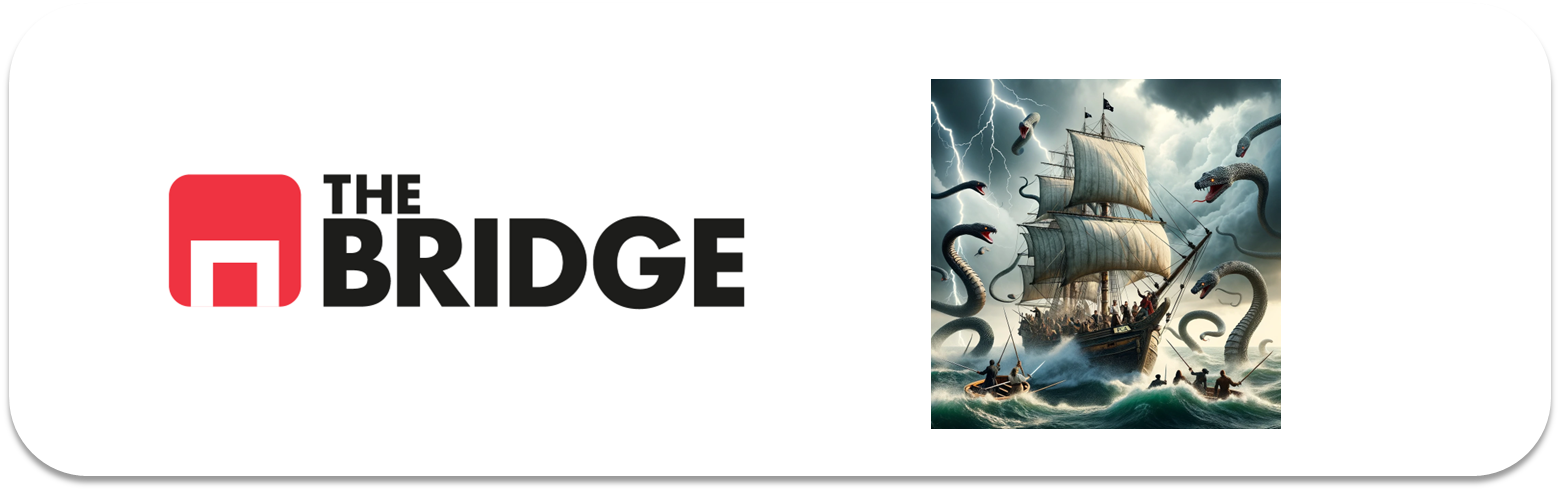

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técnicas de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
# Librerias base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias Bootcamp (Data Science - The Bridge Oct24')
import bootcampviztools as bvt
import toolbox_ML as tml

# Semilla 42 para garantizar que los datos se mantengan
np.random.seed(42)

# Modelos de ML de clasificación a utilizar en el notebook
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Herramientas de sklearn
from scipy.stats import mannwhitneyu
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, SelectFromModel, RFE, RFECV, SequentialFeatureSelector
from sklearn.metrics import mutual_info_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificación sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

In [2]:
df = pd.read_csv('./data/credit_npo.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
# Comprobar presencia de Duplicados
df.duplicated().sum()

13

In [5]:
# Comprobar presencia de valores Nulos NaN
df.isna().sum()

SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           721
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                      177
dtype: int64

In [6]:
df.dropna(inplace = True)
df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [7]:
tml.describe_df(df)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,SeriousDlqin2yrs,int64,0.0,2,0.016926
1,RevolvingUtilizationOfUnsecuredLines,float64,0.0,10314,87.288422
2,age,int64,0.0,78,0.660122
3,NumberOfTime30-59DaysPastDueNotWorse,int64,0.0,10,0.084631
4,DebtRatio,float64,0.0,11472,97.088693
5,MonthlyIncome,float64,0.0,4167,35.265741
6,NumberOfOpenCreditLinesAndLoans,int64,0.0,43,0.363913
7,NumberOfTimes90DaysLate,int64,0.0,13,0.110020
8,NumberRealEstateLoansOrLines,int64,0.0,16,0.135410
9,NumberOfTime60-89DaysPastDueNotWorse,int64,0.0,8,0.067705


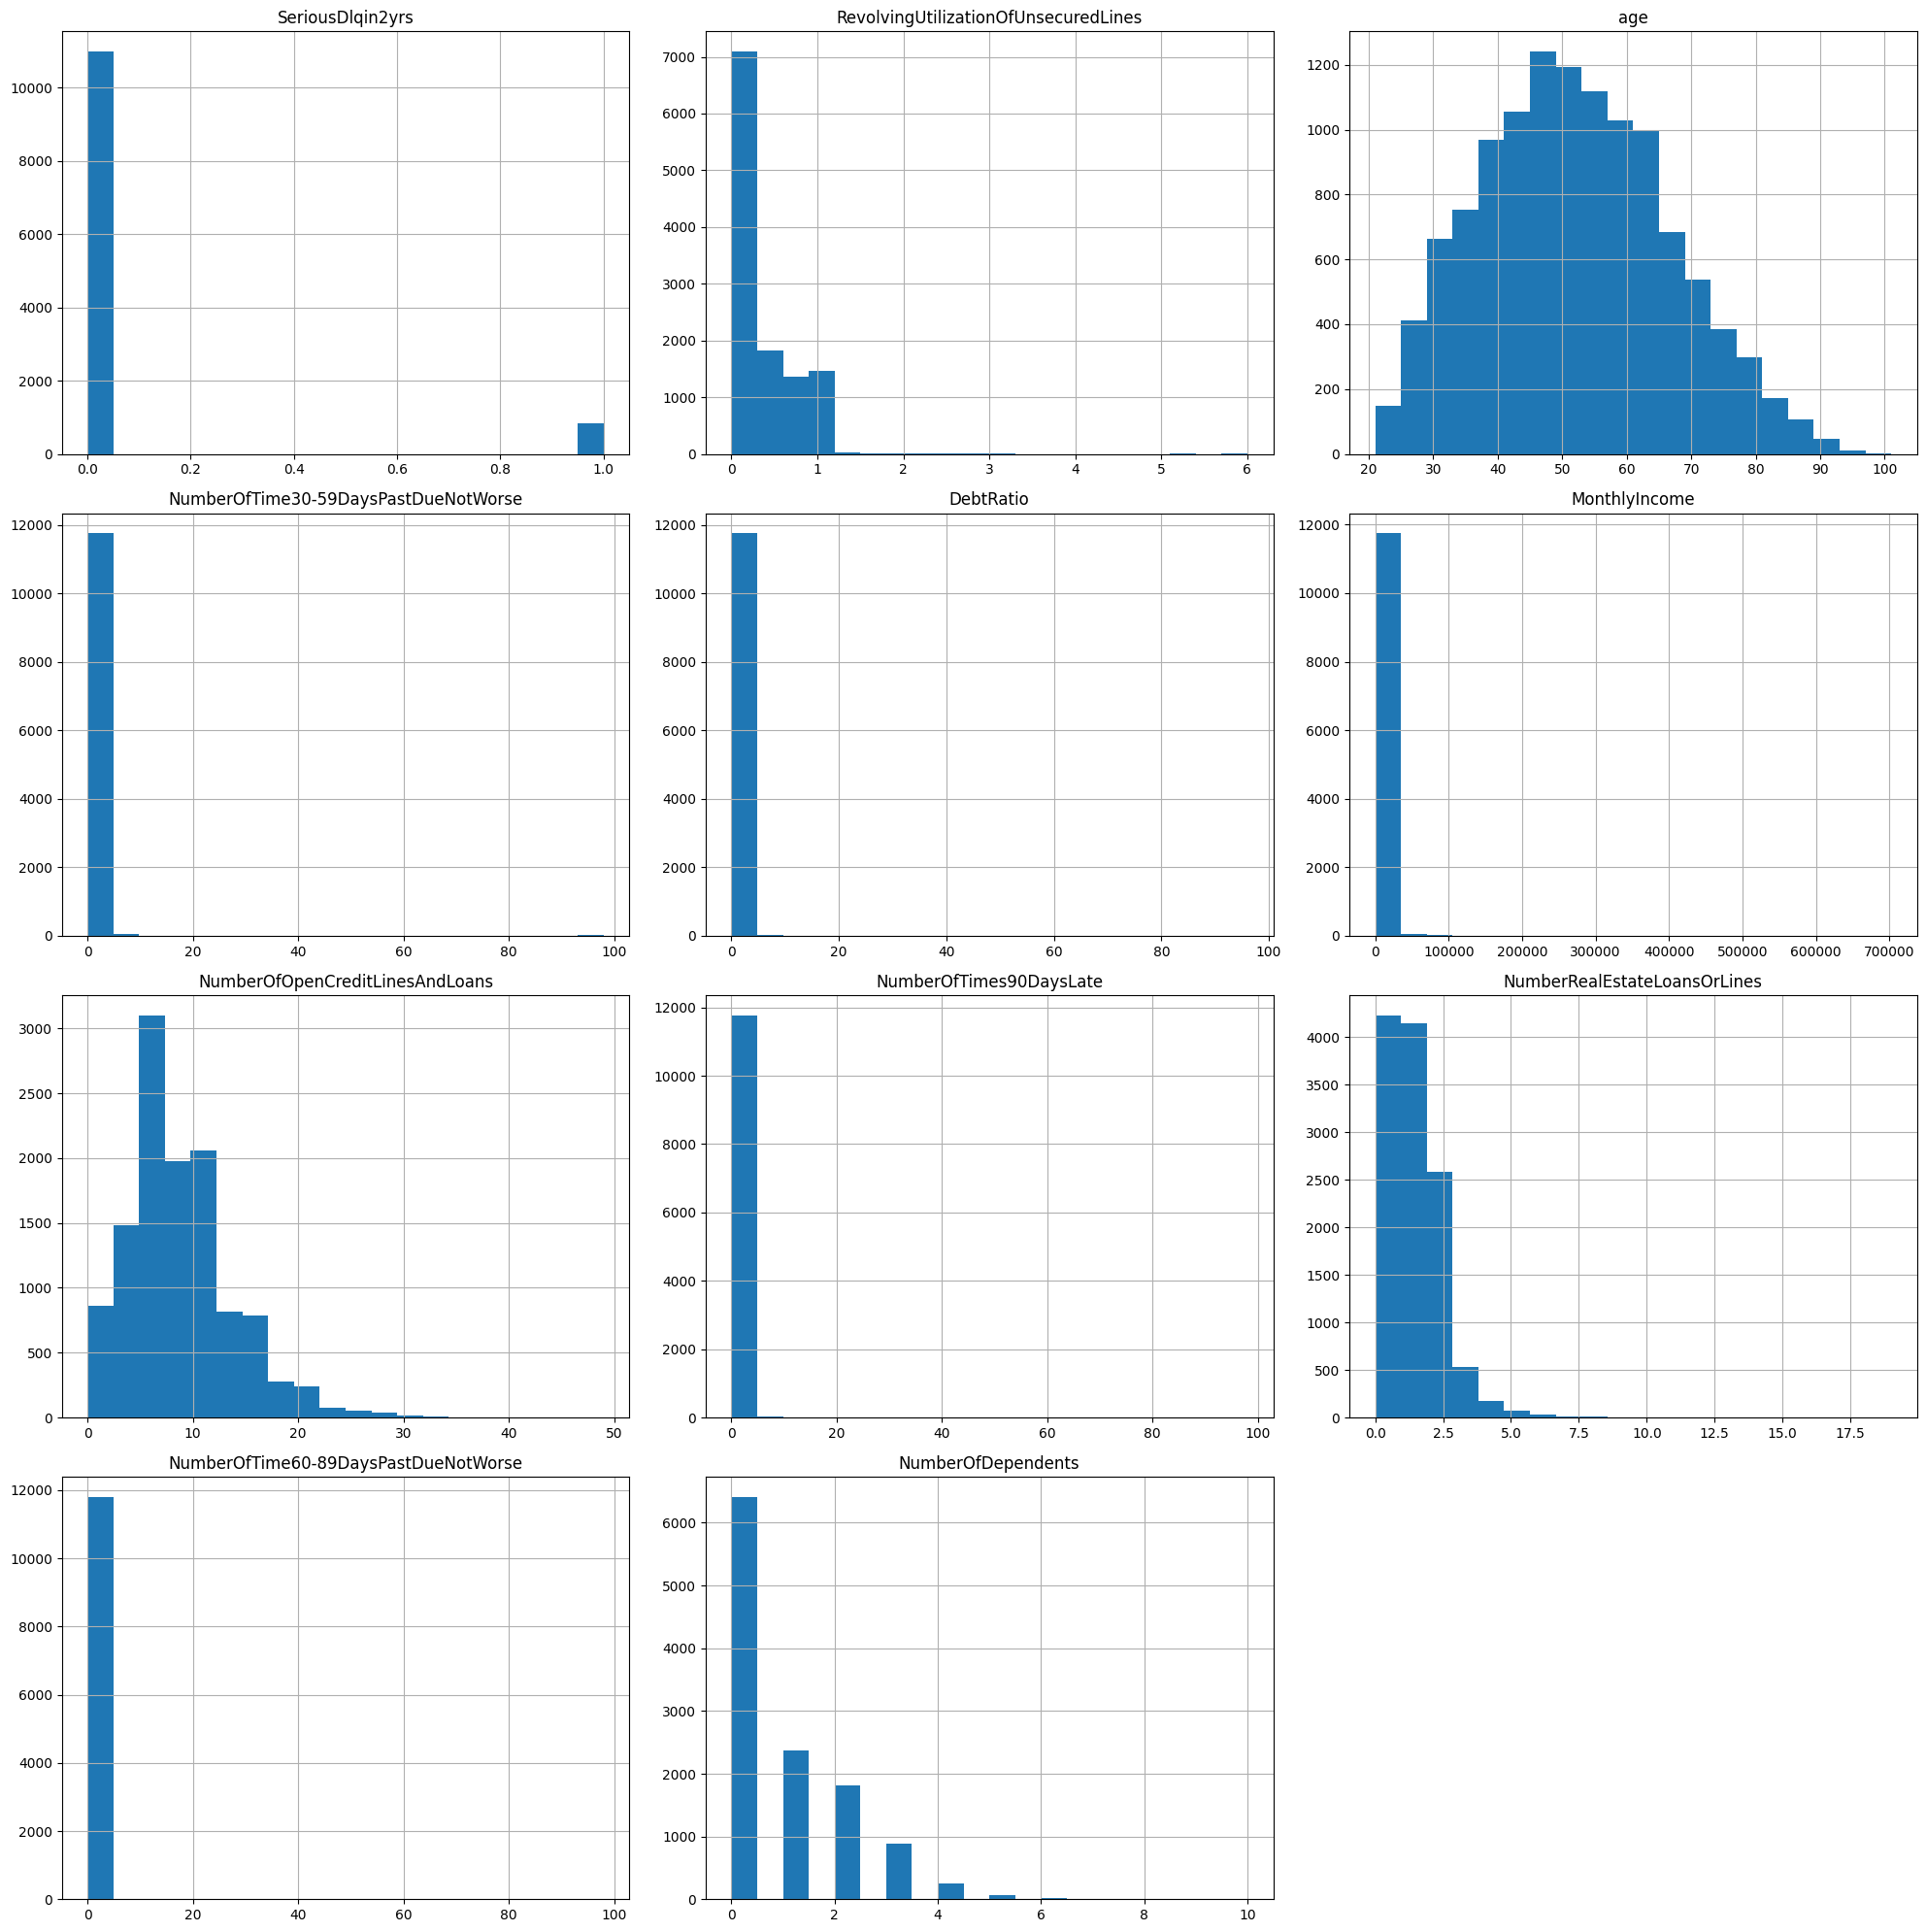

In [8]:
df.hist(bins=20, figsize=(20,20))
plt.tight_layout()
plt.show()

### 1.1 Target / Train - Test

In [9]:
target = "SeriousDlqin2yrs"

In [10]:
train_set, test_set = train_test_split(df,test_size = 0.2, random_state=42)

# 2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features

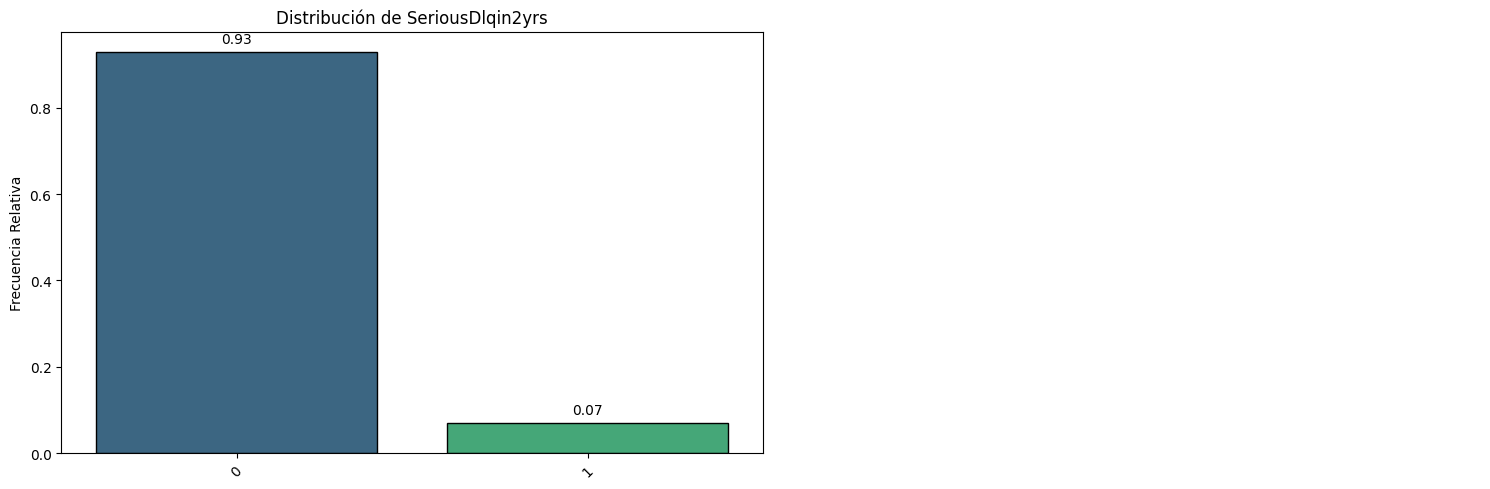

In [11]:
bvt.pinta_distribucion_categoricas(df, [target],mostrar_valores=True, relativa=True)

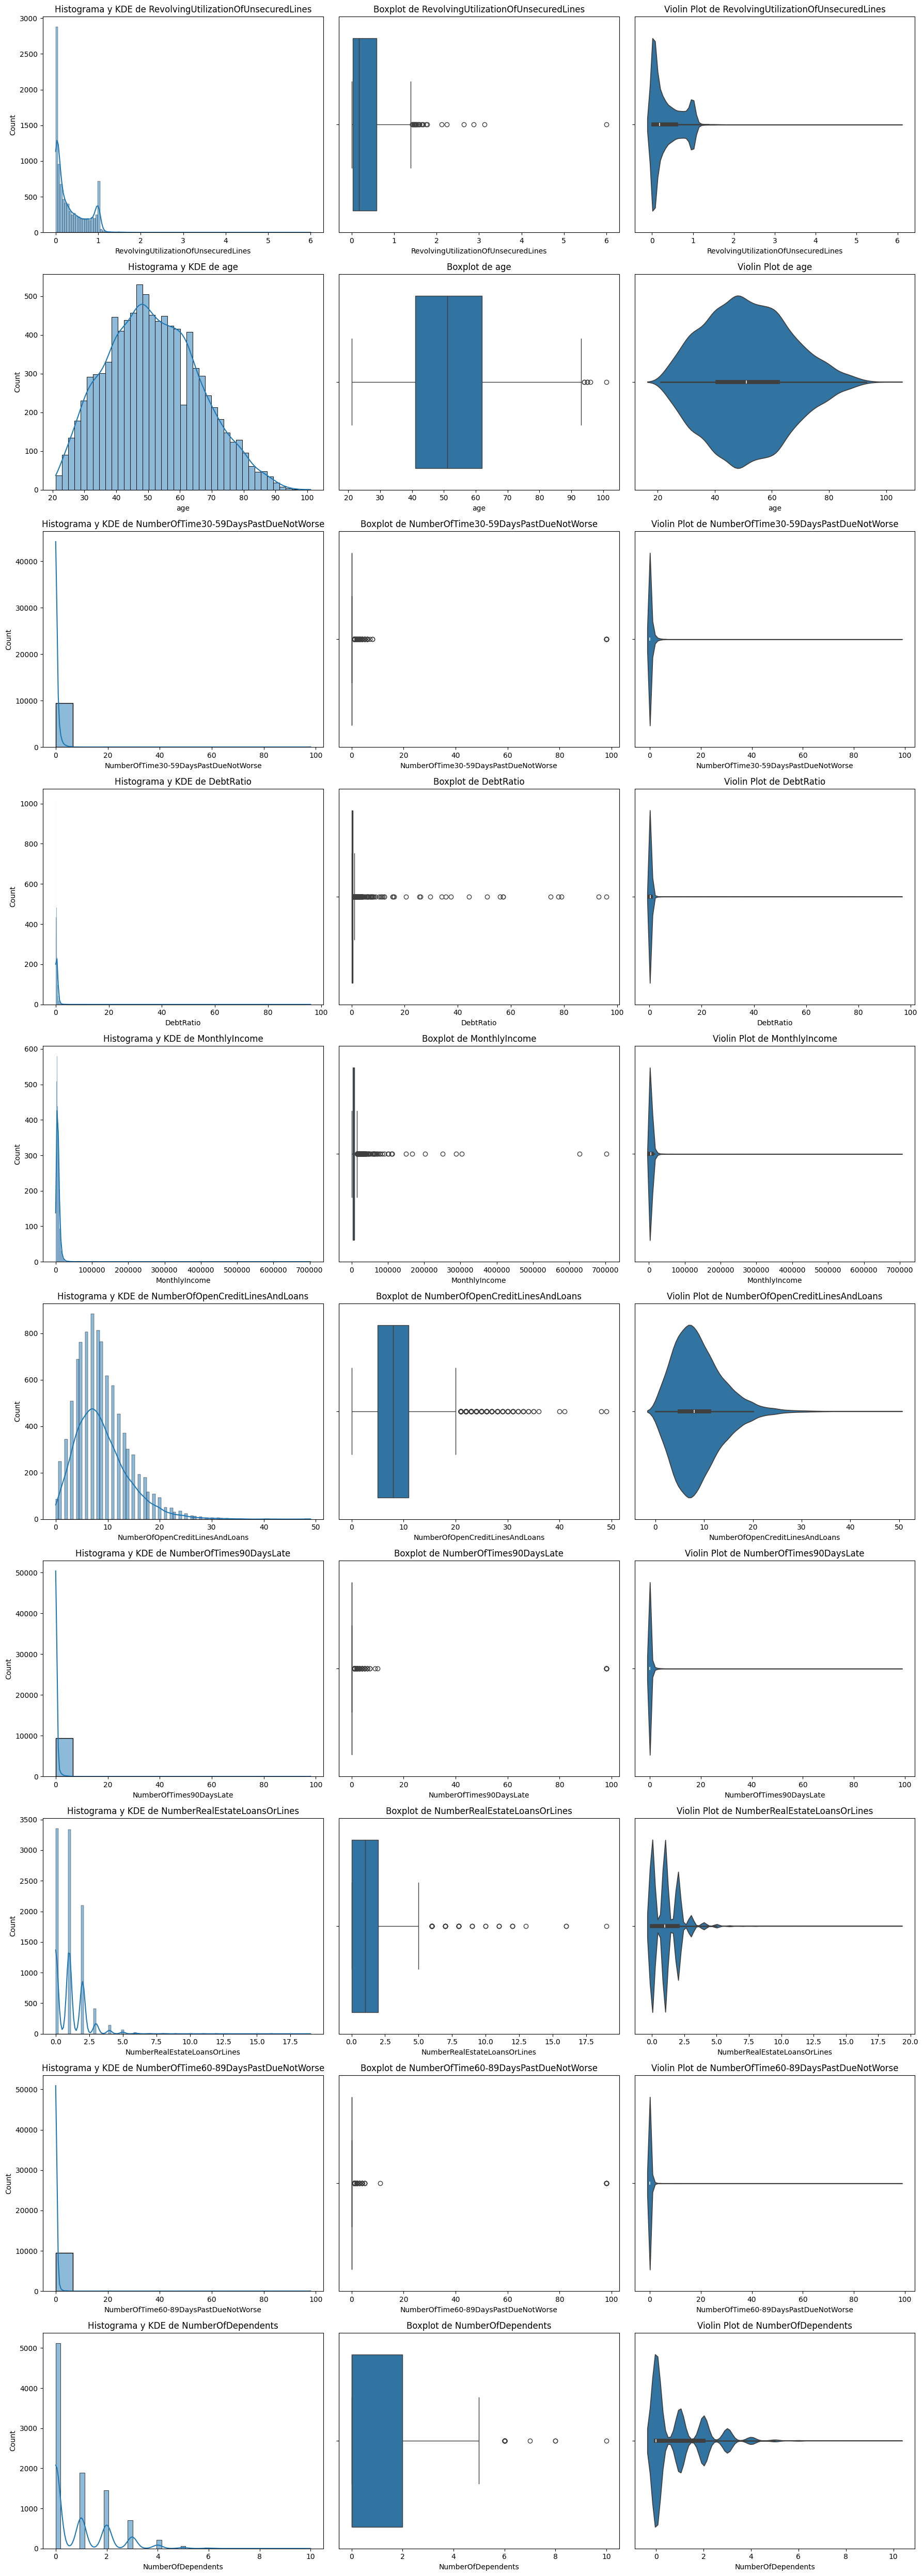

In [12]:
bvt.plot_combined_graphs(train_set, (train_set.drop([target], axis=1)).columns)

In [13]:
tml.describe_df(train_set)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,SeriousDlqin2yrs,int64,0.0,2,0.021160
1,RevolvingUtilizationOfUnsecuredLines,float64,0.0,8256,87.346593
2,age,int64,0.0,77,0.814642
3,NumberOfTime30-59DaysPastDueNotWorse,int64,0.0,10,0.105798
4,DebtRatio,float64,0.0,9194,97.270419
5,MonthlyIncome,float64,0.0,3540,37.452391
6,NumberOfOpenCreditLinesAndLoans,int64,0.0,41,0.433771
7,NumberOfTimes90DaysLate,int64,0.0,11,0.116377
8,NumberRealEstateLoansOrLines,int64,0.0,16,0.169276
9,NumberOfTime60-89DaysPastDueNotWorse,int64,0.0,8,0.084638


In [14]:
for col in train_set.columns:
    print(f"\n🔹 Value Counts de '{col}':")
    print(train_set[col].value_counts())
    print("_" * 50)


🔹 Value Counts de 'SeriousDlqin2yrs':
SeriousDlqin2yrs
0    8789
1     663
Name: count, dtype: int64
__________________________________________________

🔹 Value Counts de 'RevolvingUtilizationOfUnsecuredLines':
RevolvingUtilizationOfUnsecuredLines
0.000000    607
1.000000    584
0.155644      2
0.089080      2
0.141225      2
           ... 
0.313373      1
0.746356      1
0.044548      1
0.099729      1
0.297577      1
Name: count, Length: 8256, dtype: int64
__________________________________________________

🔹 Value Counts de 'age':
age
47     280
49     270
48     251
52     242
53     237
      ... 
95       2
94       2
93       2
101      1
96       1
Name: count, Length: 77, dtype: int64
__________________________________________________

🔹 Value Counts de 'NumberOfTime30-59DaysPastDueNotWorse':
NumberOfTime30-59DaysPastDueNotWorse
0     7856
1     1073
2      318
3      103
4       53
5       20
6       18
98       8
8        2
7        1
Name: count, dtype: int64
____________

In [15]:
featuresConversion = [col for col in train_set.columns if 'NumberOf' in col]
featuresConversion.append('NumberRealEstateLoansOrLines')

In [16]:
for col in featuresConversion:
    train_set[col] = pd.cut(train_set[col], bins=[-1, 0, 1, 2, float('inf')], labels = [0, 1, 2, 3])

for col in featuresConversion:
    test_set[col] = pd.cut(test_set[col], bins=[-1, 0, 1, 2, float('inf')], labels = [0, 1, 2, 3])

In [17]:
for col in train_set.columns:
    print(f"\n🔹 Value Counts de '{col}':")
    print(train_set[col].value_counts())
    print("_" * 50)


🔹 Value Counts de 'SeriousDlqin2yrs':
SeriousDlqin2yrs
0    8789
1     663
Name: count, dtype: int64
__________________________________________________

🔹 Value Counts de 'RevolvingUtilizationOfUnsecuredLines':
RevolvingUtilizationOfUnsecuredLines
0.000000    607
1.000000    584
0.155644      2
0.089080      2
0.141225      2
           ... 
0.313373      1
0.746356      1
0.044548      1
0.099729      1
0.297577      1
Name: count, Length: 8256, dtype: int64
__________________________________________________

🔹 Value Counts de 'age':
age
47     280
49     270
48     251
52     242
53     237
      ... 
95       2
94       2
93       2
101      1
96       1
Name: count, Length: 77, dtype: int64
__________________________________________________

🔹 Value Counts de 'NumberOfTime30-59DaysPastDueNotWorse':
NumberOfTime30-59DaysPastDueNotWorse
0    7856
1    1073
2     318
3     205
Name: count, dtype: int64
__________________________________________________

🔹 Value Counts de 'DebtRatio':

In [18]:
tml.describe_df(train_set)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,SeriousDlqin2yrs,int64,0.0,2,0.021160
1,RevolvingUtilizationOfUnsecuredLines,float64,0.0,8256,87.346593
2,age,int64,0.0,77,0.814642
3,NumberOfTime30-59DaysPastDueNotWorse,category,0.0,4,0.042319
4,DebtRatio,float64,0.0,9194,97.270419
5,MonthlyIncome,float64,0.0,3540,37.452391
6,NumberOfOpenCreditLinesAndLoans,category,0.0,4,0.042319
7,NumberOfTimes90DaysLate,category,0.0,4,0.042319
8,NumberRealEstateLoansOrLines,category,0.0,4,0.042319
9,NumberOfTime60-89DaysPastDueNotWorse,category,0.0,4,0.042319


In [19]:
tml.describe_df(test_set)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,SeriousDlqin2yrs,int64,0.0,2,0.084602
1,RevolvingUtilizationOfUnsecuredLines,float64,0.0,2069,87.521151
2,age,int64,0.0,73,3.087986
3,NumberOfTime30-59DaysPastDueNotWorse,category,0.0,4,0.169205
4,DebtRatio,float64,0.0,2313,97.842640
5,MonthlyIncome,float64,0.0,1230,52.030457
6,NumberOfOpenCreditLinesAndLoans,category,0.0,4,0.169205
7,NumberOfTimes90DaysLate,category,0.0,4,0.169205
8,NumberRealEstateLoansOrLines,category,0.0,4,0.169205
9,NumberOfTime60-89DaysPastDueNotWorse,category,0.0,4,0.169205


In [20]:
features_cat = featuresConversion
features_num = [col for col in df.columns if col not in features_cat and col != target]

In [21]:
features_cat

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'NumberRealEstateLoansOrLines']

In [22]:
features_num

['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome']

### Features Categoricas

NumberOfTime30-59DaysPastDueNotWorse


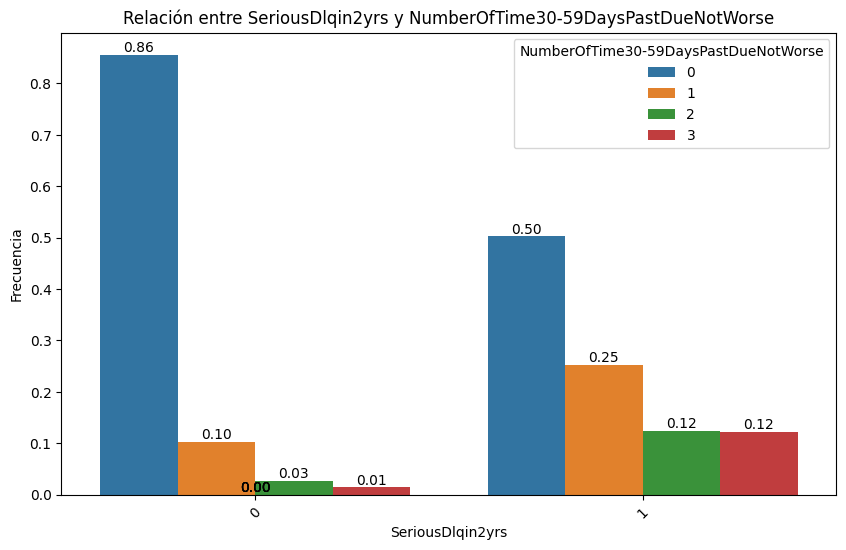

NumberOfOpenCreditLinesAndLoans


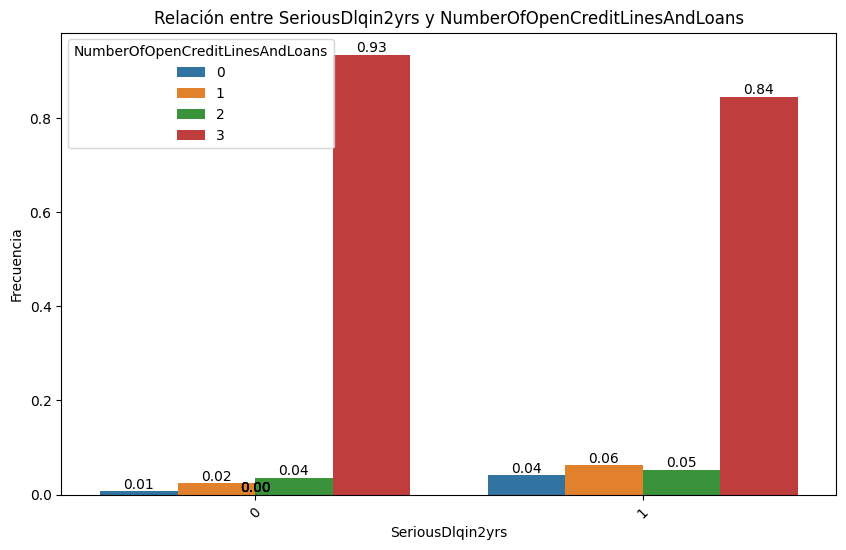

NumberOfTimes90DaysLate


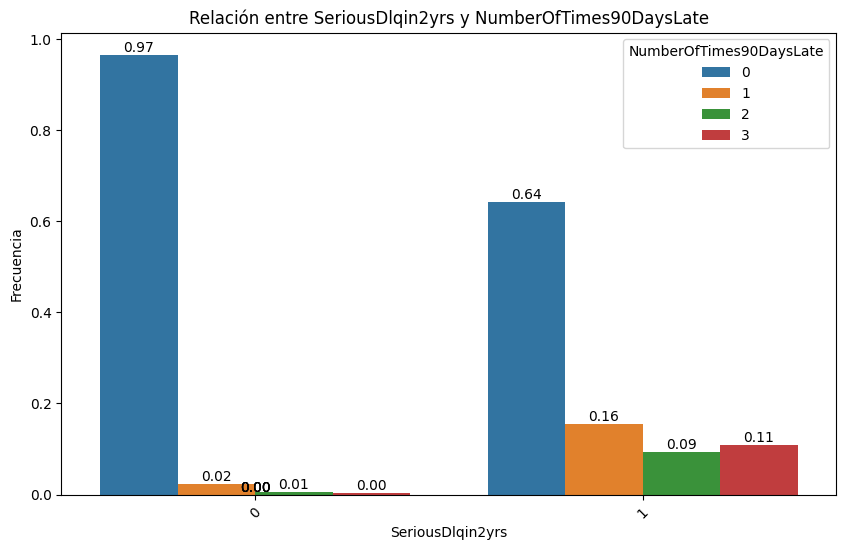

NumberOfTime60-89DaysPastDueNotWorse


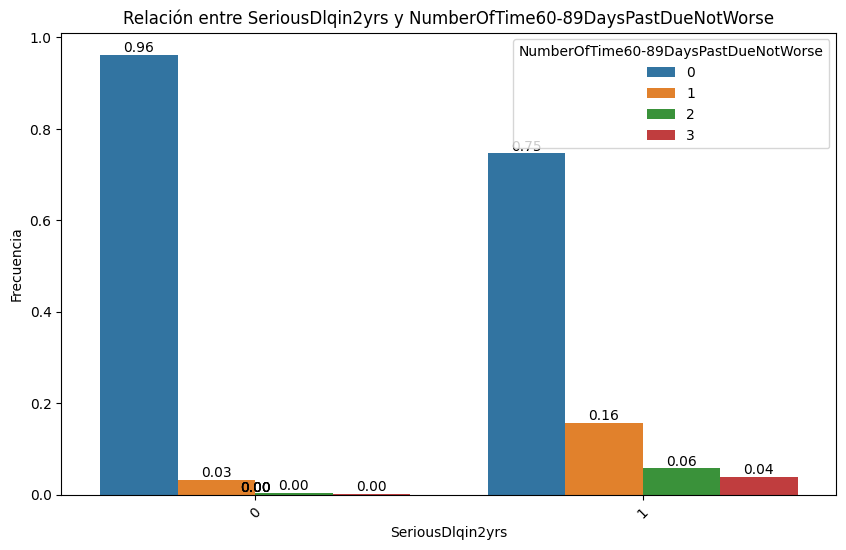

NumberOfDependents


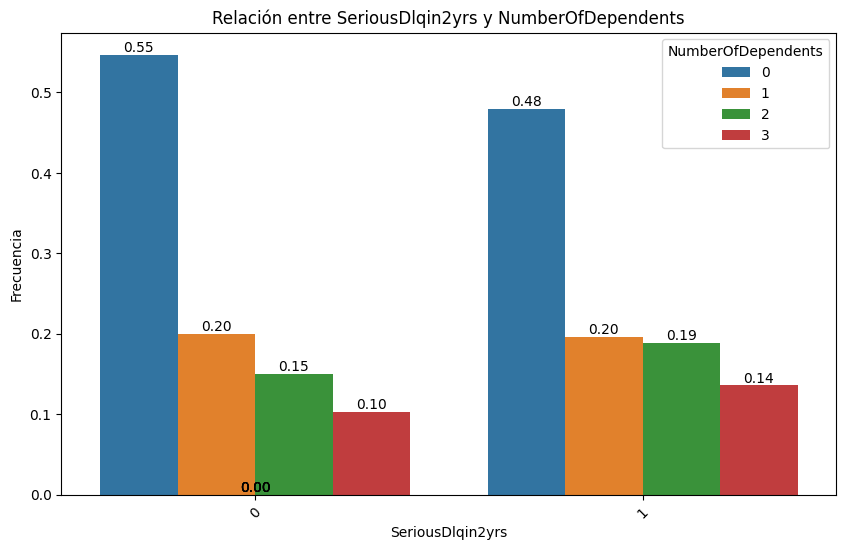

NumberRealEstateLoansOrLines


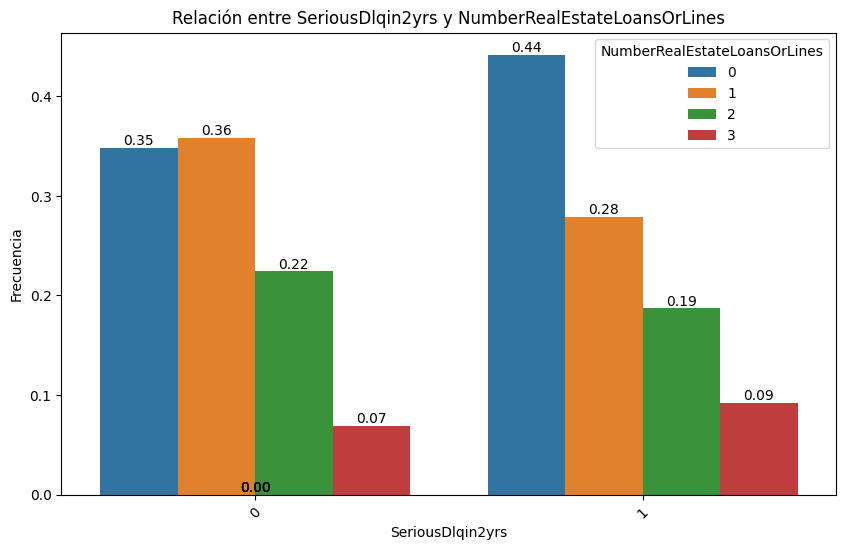

In [23]:
for col in features_cat:
    print(col)
    bvt.plot_categorical_relationship_fin(train_set, cat_col1=target, cat_col2=col, relative_freq=True, show_values=True)

Nos quedamos con las siguiente features:

- 'NumberOfTime30-59DaysPastDueNotWorse',
- 'NumberOfTimes90DaysLate',
- 'NumberOfTime60-89DaysPastDueNotWorse',
- 'NumberRealEstateLoansOrLines',
- 'RevolvingUtilizationOfUnsecuredLines',

### Features Numéricas

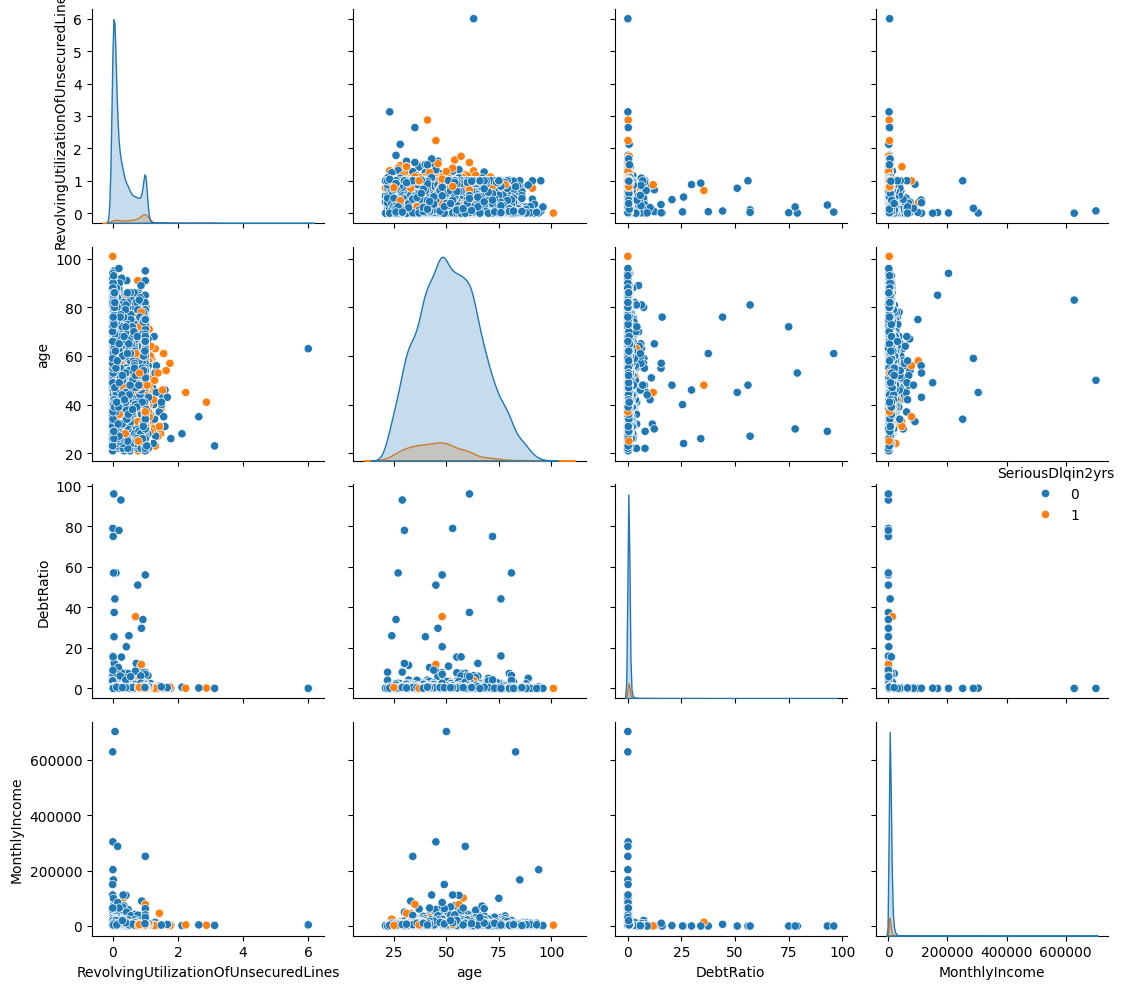

In [24]:
sns.pairplot(train_set[train_set.columns], hue=target)
plt.tight_layout()
plt.show()

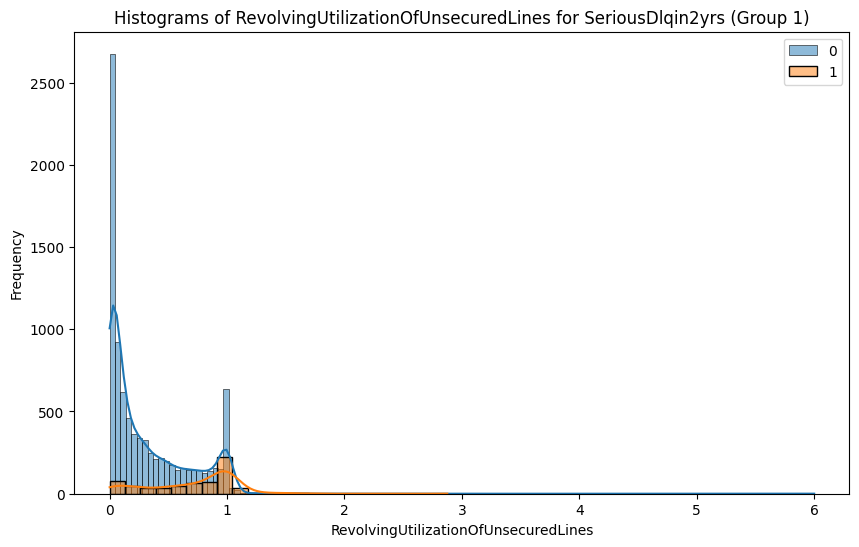

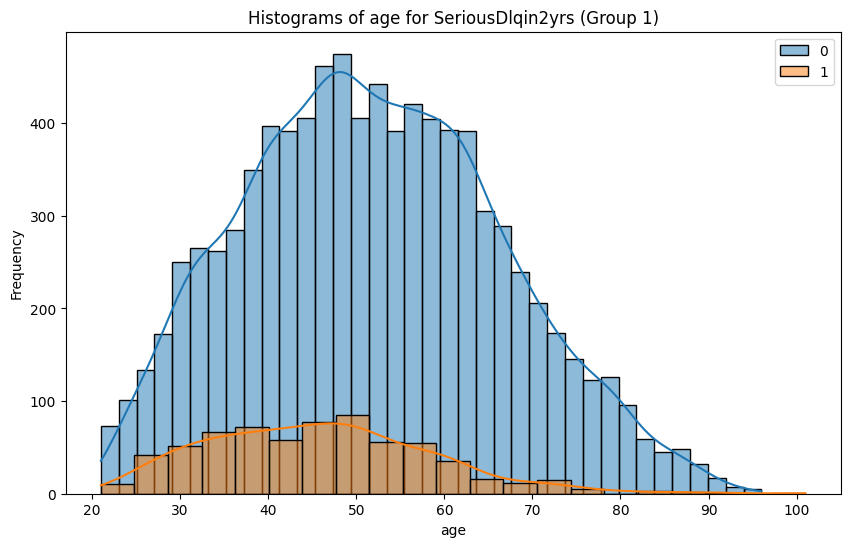

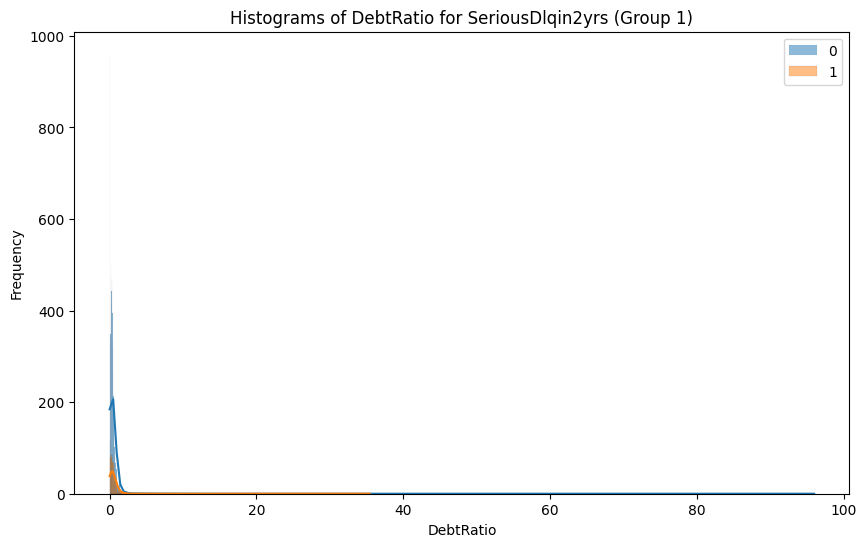

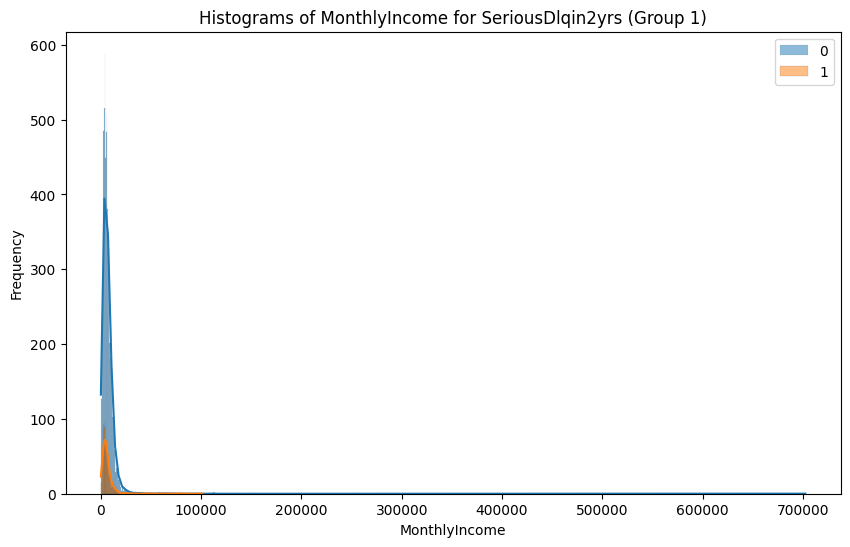

In [25]:
for col in features_num:
    bvt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

Nos quedamos con 'age' y posiblemente con 'MonthlyIncome' y 'DebtRatio', pero tienen sus valores concentrados a la derecha por lo que, los evaluaremos por separado

#### MonlthlyIncome

In [26]:
train_set['MonthlyIncome'].describe()

count      9452.000000
mean       6868.428058
std       12580.543336
min           0.000000
25%        3466.000000
50%        5441.000000
75%        8300.000000
max      702500.000000
Name: MonthlyIncome, dtype: float64

In [27]:
percentile_95_train_mon = train_set['MonthlyIncome'].quantile(0.95)
percentile_95_test_mon = test_set['MonthlyIncome'].quantile(0.95)

percentile_99_train_mon = train_set['MonthlyIncome'].quantile(0.99)
percentile_99_test_mon = test_set['MonthlyIncome'].quantile(0.99)

<Axes: >

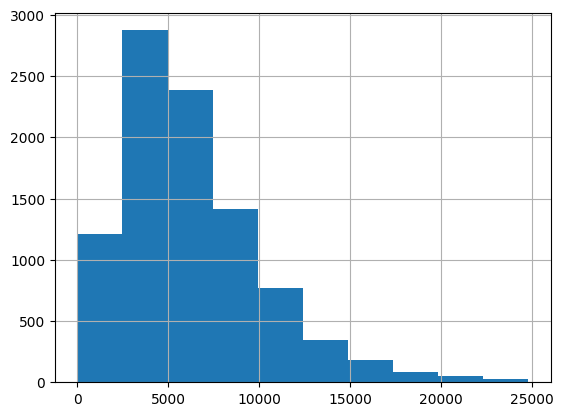

In [28]:
train_set[train_set['MonthlyIncome']<25000]['MonthlyIncome'].hist()

In [29]:
train_set['MonthlyIncomeQ99'] = train_set['MonthlyIncome'].clip(upper=percentile_99_train_mon)
test_set['MonthlyIncomeQ99'] = test_set['MonthlyIncome'].clip(upper=percentile_99_test_mon)

<Axes: >

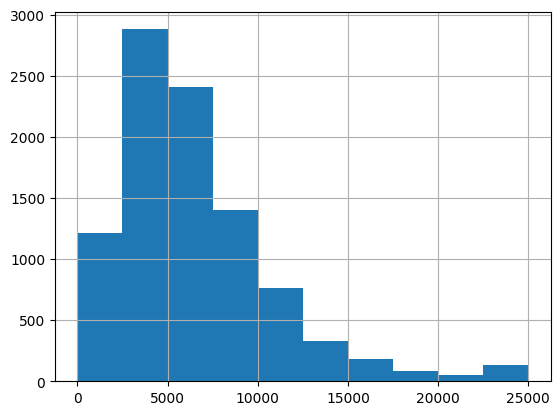

In [30]:
# Nos quedamos con el Q99 de MonthlyIcome ya que ahi en donde se concentran la mayor cantidad de valores
train_set['MonthlyIncomeQ99'].hist()

### DebtRatio

In [31]:
train_set['DebtRatio'].describe()

count    9452.000000
mean        0.486047
std         2.505031
min         0.000000
25%         0.146204
50%         0.297564
75%         0.477876
max        96.000000
Name: DebtRatio, dtype: float64

In [32]:
train_set['DebtRatio'].value_counts()

DebtRatio
0.000000    186
1.000000      3
0.294341      2
0.003200      2
0.157461      2
           ... 
0.350887      1
0.069607      1
0.346664      1
0.165180      1
0.354829      1
Name: count, Length: 9194, dtype: int64

In [33]:
percentile_99_train_debt = train_set['DebtRatio'].quantile(0.99)
percentile_99_test_debt = test_set['DebtRatio'].quantile(0.99)

In [34]:
percentile_99_test_debt

2.3877337440099877

<Axes: >

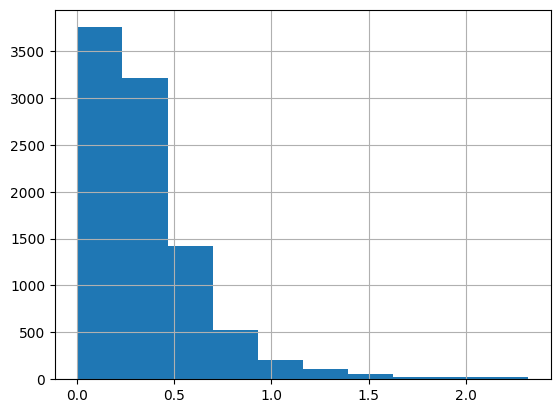

In [35]:
# Nos quedamos con el Q99 de DebtRatio ya que ahi en donde se concentran la mayor cantidad de valores

train_set[train_set['DebtRatio']<percentile_99_train_debt]['DebtRatio'].hist()

In [36]:
train_set['DebtRatioQ99'] = train_set['DebtRatio'].clip(upper=percentile_99_train_debt)
test_set['DebtRatioQ99'] = test_set['DebtRatio'].clip(upper=percentile_99_test_debt)

In [37]:
train_set.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'MonthlyIncomeQ99', 'DebtRatioQ99'],
      dtype='object')

In [38]:
feat_trans = ['MonthlyIncomeQ99', 'DebtRatioQ99']

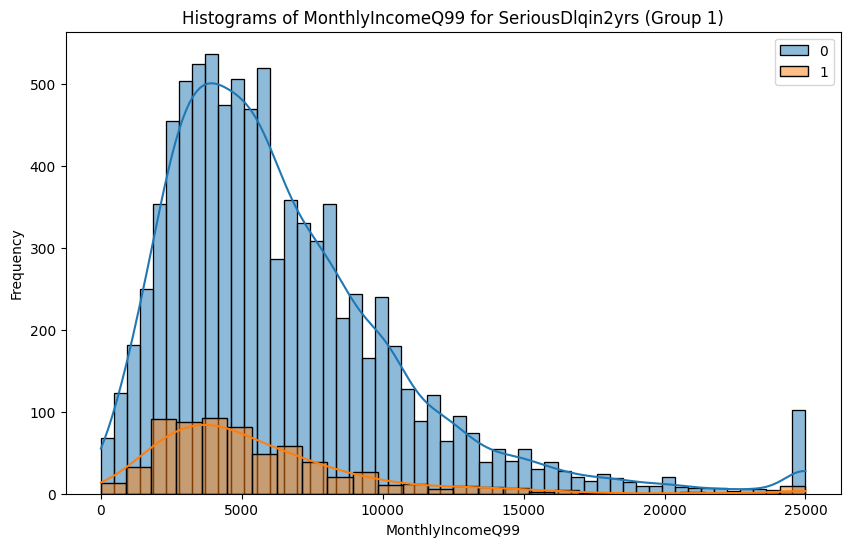

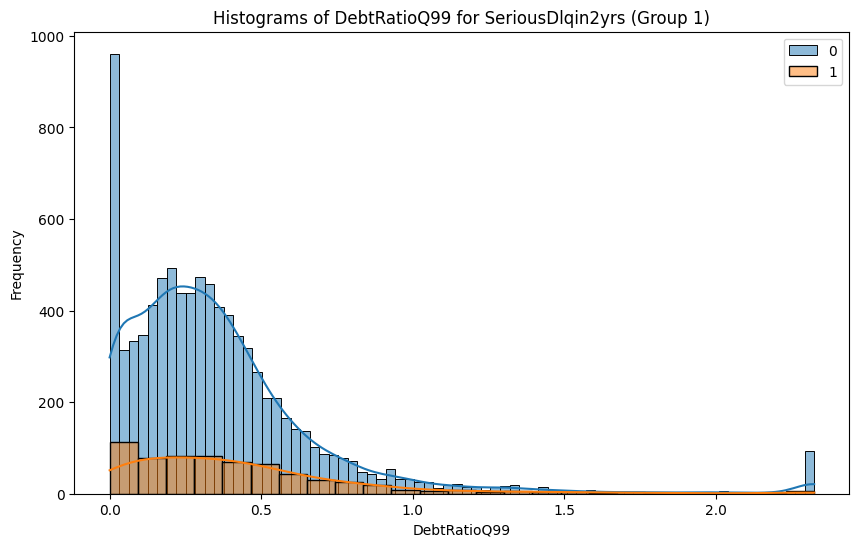

In [39]:
for col in feat_trans:
    bvt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

In [40]:
# Features seleccionadas por método visual según importancia (relación con el target)
features_vis = ['age',
                'NumberOfTime30-59DaysPastDueNotWorse',
                'NumberOfTimes90DaysLate',
                'NumberOfTime60-89DaysPastDueNotWorse',
                'NumberRealEstateLoansOrLines',
                'RevolvingUtilizationOfUnsecuredLines',
                'DebtRatioQ99',
                'MonthlyIncomeQ99']

<Axes: >

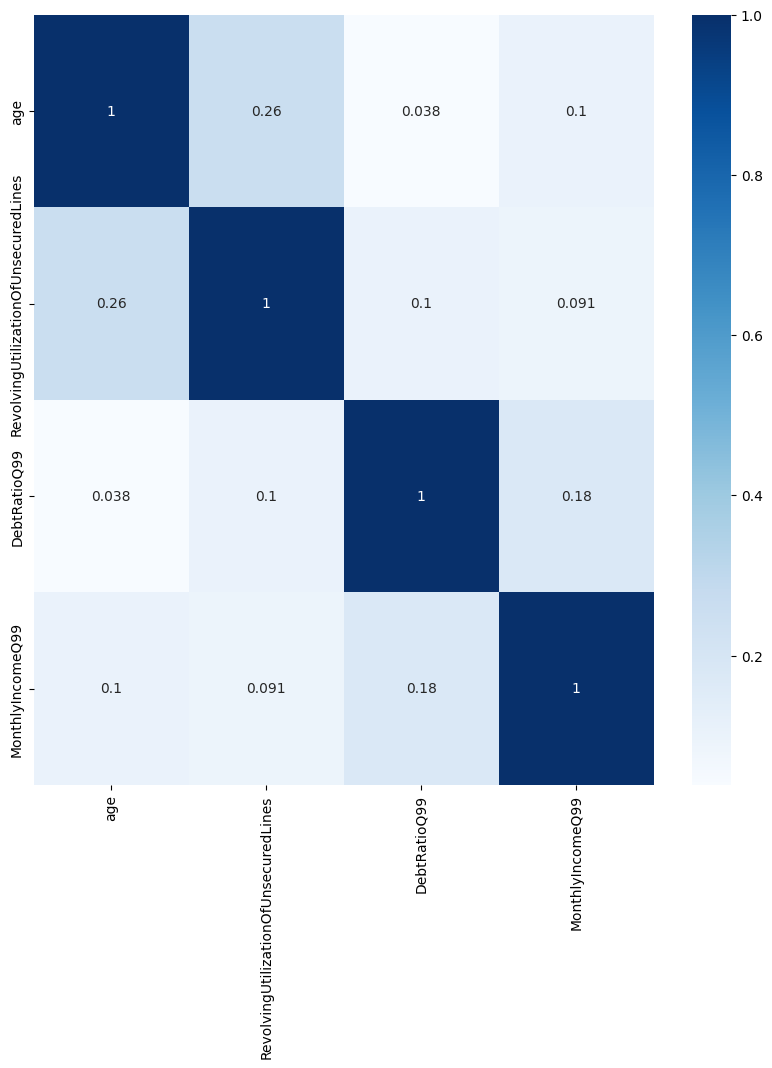

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(train_set[features_vis].corr(numeric_only=True)), annot=True, cmap='Blues')

In [42]:
allFeatures = [col for col in train_set.columns]


<Axes: >

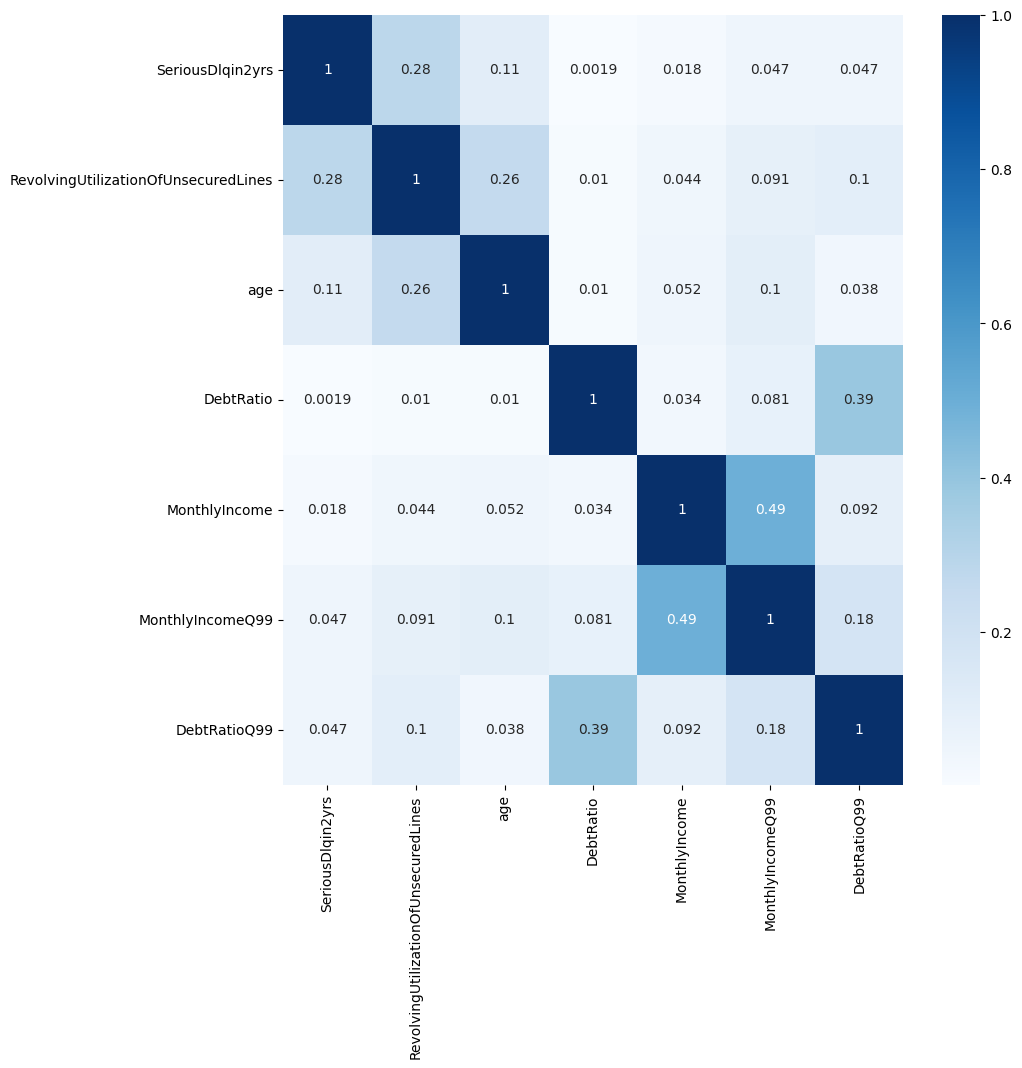

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(train_set[allFeatures].corr(numeric_only=True)), annot=True, cmap='Blues')

In [44]:
train_set.drop(columns=['MonthlyIncome', 'DebtRatio'], inplace=True)

In [45]:
X_train = train_set.drop([target], axis=1)
X_test = test_set.drop([target], axis=1)

y_train = train_set[target]
y_test = test_set[target]

In [46]:
# Features visualmente selecionadas según importancia en train y test
X_train_vis = X_train[features_vis]
X_test_vis = X_test[features_vis]

## Baseline

In [47]:
rfBSL = RandomForestClassifier(n_estimators=1, max_depth=7, random_state=42)

scoreBSL = np.mean(cross_val_score(rfBSL, X_train, y_train, cv=5, scoring='balanced_accuracy'))
print(f'Baseline balanced accuracy score (All features): {scoreBSL*100}%\nNumber of features: {len(X_train.columns)}')

Baseline balanced accuracy score (All features): 58.68413281089862%
Number of features: 10


In [48]:
rfVis = RandomForestClassifier(n_estimators=1, max_depth=7, random_state=42)
scoreVis = np.mean(cross_val_score(rfVis, X_train_vis, y_train, cv=5, scoring='balanced_accuracy'))
print(f'Baseline balanced accuracy score (Features_vis): {scoreVis*100}%\nNumber of features: {len(X_train_vis.columns)}')

Baseline balanced accuracy score (Features_vis): 58.1978371773064%
Number of features: 8


## ANOVA

In [49]:
numFeatsANOVA = 5
selectFeature = SelectKBest(f_classif, k=numFeatsANOVA).fit(X_train, y_train)

In [50]:
bestFeatures = pd.DataFrame({'Feature': X_train.columns, 'Score': selectFeature.scores_}).sort_values(by='Score', ascending=False)
featuresANOVA = list(selectFeature.get_feature_names_out())
bestFeatures

,Feature,Score
4,NumberOfTimes90DaysLate,1626.925118
0,RevolvingUtilizationOfUnsecuredLines,829.602605
2,NumberOfTime30-59DaysPastDueNotWorse,774.124507
6,NumberOfTime60-89DaysPastDueNotWorse,742.235252
3,NumberOfOpenCreditLinesAndLoans,113.659887
1,age,111.110548
8,MonthlyIncomeQ99,21.055131
9,DebtRatioQ99,20.519892
7,NumberOfDependents,16.642733
5,NumberRealEstateLoansOrLines,5.131959


In [51]:
featuresANOVA

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [52]:
X_trainANOVA = selectFeature.transform(X_train)

rfANOVA = RandomForestClassifier(n_estimators=1, max_depth=7, random_state=42)

scoreANOVA = np.mean(cross_val_score(rfANOVA, X_trainANOVA, y_train, cv=5, scoring='balanced_accuracy'))
print(f'ANOVA balanced accuracy score: {scoreANOVA*100}%')

ANOVA balanced accuracy score: 57.097041154878426%


 ### RFE

In [53]:
rfRFE = rfBSL

numFeatsRFE = 5
rfe = RFE(estimator=rfBSL, n_features_to_select=numFeatsRFE, step=1)
rfe.fit(X_train, y_train)
X_trainRFE = rfe.transform(X_train)

scoreRFE = np.mean(cross_val_score(rfRFE, X_trainRFE, y_train, cv=5, scoring='balanced_accuracy'))
print(f'RFE balanced accuracy score: {scoreRFE*100}%')

RFE balanced accuracy score: 57.809259735107624%


In [54]:
featuresRFE = list(rfe.get_feature_names_out())
featuresRFE

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'MonthlyIncomeQ99',
 'DebtRatioQ99']

## select_from_model

In [55]:
selectorModel = SelectFromModel(estimator=rfBSL, threshold='median')
selectorModel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=7, n_estimators=1,
                                                 random_state=42),
                threshold='median')

In [56]:
selectorModelFeatures = list(selectorModel.get_feature_names_out())
selectorModelFeatures

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'MonthlyIncomeQ99']

## RFECV

In [57]:
rfRFECV = RFECV(estimator=rfBSL, step=1, cv=5, scoring='balanced_accuracy')
rfRFECV.fit(X_train, y_train)
rfRFECVFeatures = list(rfRFECV.get_feature_names_out())

In [58]:
rfRFECVFeatures

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTimes90DaysLate',
 'MonthlyIncomeQ99',
 'DebtRatioQ99']

In [74]:
featureSets = {'Todas las features':X_train.columns.to_list(), 'Features Visual':features_vis, 'Features ANOVA':featuresANOVA, 'features RFE':featuresRFE, 'Selector Model Features':selectorModelFeatures, 'Random Forest RFECV Features':rfRFECVFeatures}

In [75]:
featureSets

{'Todas las features': ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'NumberOfTime30-59DaysPastDueNotWorse',
  'NumberOfOpenCreditLinesAndLoans',
  'NumberOfTimes90DaysLate',
  'NumberRealEstateLoansOrLines',
  'NumberOfTime60-89DaysPastDueNotWorse',
  'NumberOfDependents',
  'MonthlyIncomeQ99',
  'DebtRatioQ99'],
 'Features Visual': ['age',
  'NumberOfTime30-59DaysPastDueNotWorse',
  'NumberOfTimes90DaysLate',
  'NumberOfTime60-89DaysPastDueNotWorse',
  'NumberRealEstateLoansOrLines',
  'RevolvingUtilizationOfUnsecuredLines',
  'DebtRatioQ99',
  'MonthlyIncomeQ99'],
 'Features ANOVA': ['RevolvingUtilizationOfUnsecuredLines',
  'NumberOfTime30-59DaysPastDueNotWorse',
  'NumberOfOpenCreditLinesAndLoans',
  'NumberOfTimes90DaysLate',
  'NumberOfTime60-89DaysPastDueNotWorse'],
 'features RFE': ['RevolvingUtilizationOfUnsecuredLines',
  'NumberOfTime30-59DaysPastDueNotWorse',
  'NumberOfTimes90DaysLate',
  'MonthlyIncomeQ99',
  'DebtRatioQ99'],
 'Selector Model Features': ['Revolving

2.6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

In [61]:
# Unir todas las listas en una sola
lista_total = features_vis + featuresANOVA + featuresRFE + selectorModelFeatures + rfRFECVFeatures

# Crear un DataFrame con las features
df_features = pd.DataFrame(lista_total, columns=["Feature"])

# Contar cuántas veces aparece cada feature y resetear el índice
df_features = df_features.value_counts().reset_index()

# Renombrar las columnas
df_features.columns = ["Feature", "Frecuencia"]

# Ordenar por frecuencia de mayor a menor
df_features = df_features.sort_values(by="Frecuencia", ascending=False)

# Mostrar el DataFrame
df_features

,Feature,Frecuencia
0,NumberOfTimes90DaysLate,5
1,RevolvingUtilizationOfUnsecuredLines,5
2,MonthlyIncomeQ99,4
3,NumberOfTime30-59DaysPastDueNotWorse,4
4,DebtRatioQ99,3
5,NumberOfTime60-89DaysPastDueNotWorse,2
6,age,2
7,NumberOfOpenCreditLinesAndLoans,1
8,NumberRealEstateLoansOrLines,1


Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

In [62]:
df_features_filtrado = df_features[df_features["Frecuencia"] > 2]
df_features_filtrado

,Feature,Frecuencia
0,NumberOfTimes90DaysLate,5
1,RevolvingUtilizationOfUnsecuredLines,5
2,MonthlyIncomeQ99,4
3,NumberOfTime30-59DaysPastDueNotWorse,4
4,DebtRatioQ99,3


In [63]:
features_sel = df_features[df_features["Frecuencia"] > 2]["Feature"].tolist()
features_sel

['NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'MonthlyIncomeQ99',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatioQ99']

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

In [64]:
print(X_train.columns)

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'MonthlyIncomeQ99', 'DebtRatioQ99'],
      dtype='object')


In [76]:
# Asegurar que todas las columnas categóricas sean convertidas a tipo adecuado
X_train = X_train.copy()
for col in X_train.select_dtypes(include=['category']).columns:
    X_train[col] = X_train[col].astype(int)

X_test = X_test.copy()
for col in X_test.select_dtypes(include=['category']).columns:
    X_test[col] = X_test[col].astype(int)


# Definir los modelos con hiperparámetros ajustados
models = {
    "LGBM": LGBMClassifier(max_depth=-1, class_weight='balanced', random_state=42, verbose=-100),
    "XGB": XGBClassifier(max_depth=6, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42),
    "RF": RandomForestClassifier(max_depth=10, class_weight='balanced', random_state=42)
}

# Evaluar modelos
results = []

for setName, feature_set in featureSets.items():
    X = X_train[feature_set]
    
    print(f"\n📌 Evaluando Feature Set: {setName}")
    
    for model_name, model in models.items():
        score = np.mean(cross_val_score(model, X, y_train, cv=5, scoring='balanced_accuracy'))
        results.append((setName, model_name, score))
        print(f"{model_name} - Balanced Accuracy: {score:.4f}")

# Convertir resultados en DataFrame para mejor visualización
results_df = pd.DataFrame(results, columns=["Feature Set", "Model", "Balanced Accuracy"])

# Encontrar el mejor modelo y conjunto de features
best_result = results_df.loc[results_df['Balanced Accuracy'].idxmax()]
print("\n🏆 Mejor combinación:")
print(best_result)




📌 Evaluando Feature Set: Todas las features
LGBM - Balanced Accuracy: 0.7269
XGB - Balanced Accuracy: 0.6385
RF - Balanced Accuracy: 0.6780

📌 Evaluando Feature Set: Features Visual
LGBM - Balanced Accuracy: 0.7236
XGB - Balanced Accuracy: 0.6475
RF - Balanced Accuracy: 0.6796

📌 Evaluando Feature Set: Features ANOVA
LGBM - Balanced Accuracy: 0.7494
XGB - Balanced Accuracy: 0.6924
RF - Balanced Accuracy: 0.6868

📌 Evaluando Feature Set: features RFE
LGBM - Balanced Accuracy: 0.7243
XGB - Balanced Accuracy: 0.6556
RF - Balanced Accuracy: 0.6725

📌 Evaluando Feature Set: Selector Model Features
LGBM - Balanced Accuracy: 0.7319
XGB - Balanced Accuracy: 0.6620
RF - Balanced Accuracy: 0.6801

📌 Evaluando Feature Set: Random Forest RFECV Features
LGBM - Balanced Accuracy: 0.6971
XGB - Balanced Accuracy: 0.6443
RF - Balanced Accuracy: 0.6819

🏆 Mejor combinación:
Feature Set          Features ANOVA
Model                          LGBM
Balanced Accuracy          0.749425
Name: 6, dtype: object

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test

In [73]:
# Mejor conjunto de características
best_features = featureSets[best_result["Feature Set"]]
X_best = X_train[best_features]

# Definir el modelo LGBM con class_weight balanceado
best_model = LGBMClassifier(random_state=42, class_weight='balanced')

# Definir los parámetros a buscar
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0]
}

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search.fit(X_best, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("\n🔍 Mejores hiperparámetros para LGBM:")
print(grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test[best_features], y_test)
print(f"\n📊 Balanced Accuracy en Test: {test_score:.4f}")


🔍 Mejores hiperparámetros para LGBM:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

📊 Balanced Accuracy en Test: 0.7796


In [72]:
# Reporte de clasificación
y_pred = best_model.predict(X_test[best_features])
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      2197
           1       0.19      0.67      0.30       167

    accuracy                           0.78      2364
   macro avg       0.58      0.73      0.58      2364
weighted avg       0.91      0.78      0.83      2364



### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.